# 最適な比率を計算する

- リバランスはノーセルリバランスのみ
- PFは2資産まで確認済

In [9]:
from deal import buy_fund, rebalance_buy
from load_ts import pick_csv_data
from risk_return import anualized_return, anualized_risk

import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.rcParams['font.family'] = 'Tsukushi A Round Gothic'

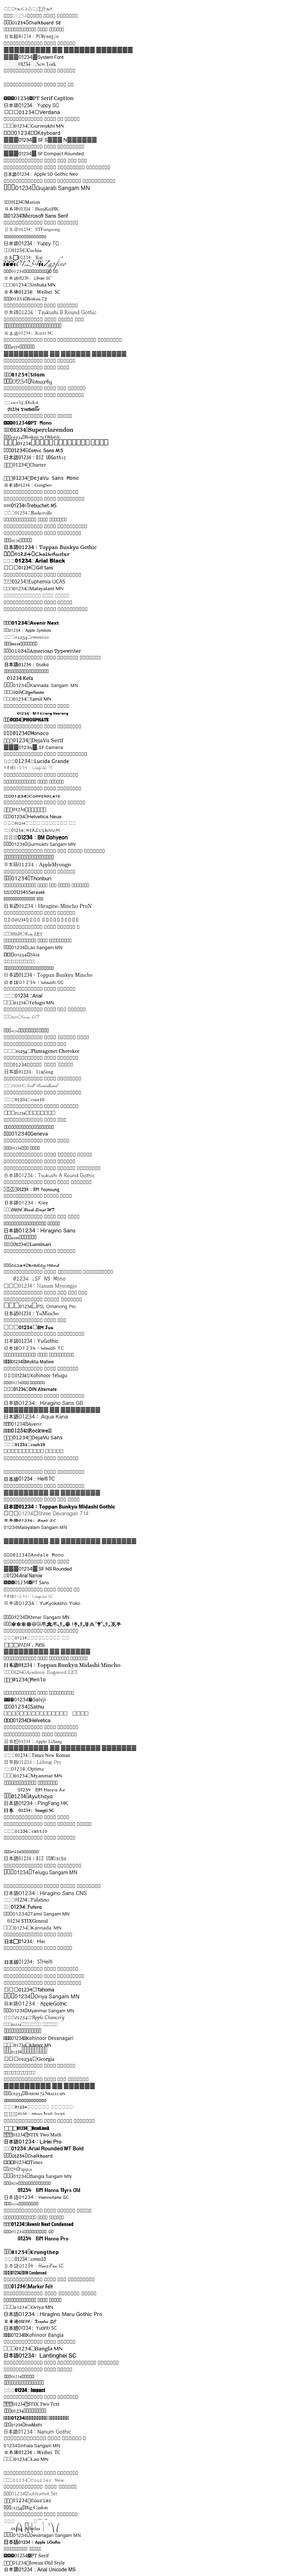

In [10]:
import matplotlib
#display(matplotlib.matplotlib_fname())  # 設定ファイルの位置
#display(matplotlib.get_configdir())  # フォントキャッシュのディレクトリ
#display(plt.rcParams)  # 設定の出力

# フォントリストの読み込み
fonts = set([f.name for f in matplotlib.font_manager.fontManager.ttflist])

# 描画領域のサイズ調整
plt.figure(figsize=(10,len(fonts)/4))
 
# フォントの表示
for i, font in enumerate(fonts):
    plt.text(0, i, f"日本語01234：{font}", fontname=font)
    
# 見やすいように軸を消す
plt.ylim(0, len(fonts))
plt.axis("off")
plt.show()
# 出力されたフォントリストから、好きなものを plt.rcParams['font.family'] にセットする

In [21]:
conditions = [[{ 'ｅＭＡＸＩＳ　Ｓｌｉｍ全世界株式（オール・カントリー）':p
               , 'ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）':(10-p)
               }  # portfolio
               , list(range(1,13))  # 購入月
               , 1  # 購入金額
               , f'ACWI {p}:GLD {10-p}'  # 条件名
              ] for p in range(11)
             ]
conditions += [[{ 'ｅＭＡＸＩＳ　Ｓｌｉｍ米国株式（Ｓ＆Ｐ５００）':p
               , 'ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）':(10-p)
               }  # portfolio
               , list(range(1,13))  # 購入月
               , 1  # 購入金額
               , f'SP500 {p}:GLD {10-p}'  # 条件名
              ] for p in range(11)
             ]

,ｅＭＡＸＩＳ Ｓｌｉｍ全世界株式（オール・カントリー）,ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）
年月日,,
2025-03-03,0.0,151.728282
2025-03-04,0.0,152.356830
2025-03-05,0.0,154.257679
2025-03-06,0.0,153.983956
2025-03-07,0.0,151.981729


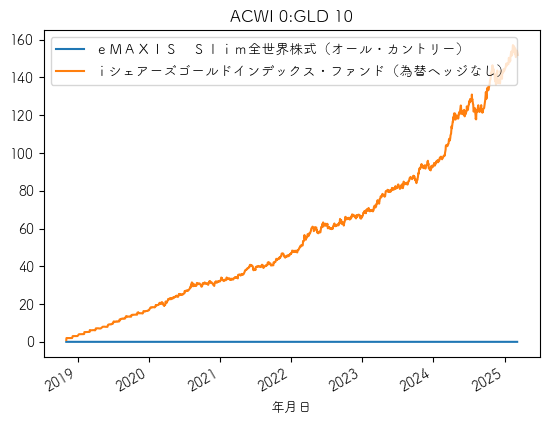

/var/folders/qb/1x__vlx132q0z6t8nsvyly100000gn/T/ipykernel_34379/3720497242.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.9' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  buy_history.loc[t] += buy_rate*buy_amount


,ｅＭＡＸＩＳ Ｓｌｉｍ全世界株式（オール・カントリー）,ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）
年月日,,
2025-03-03,15.143533,136.291800
2025-03-04,14.873325,136.856400
2025-03-05,14.787401,138.563861
2025-03-06,14.947378,138.317987
2025-03-07,14.652297,136.519461


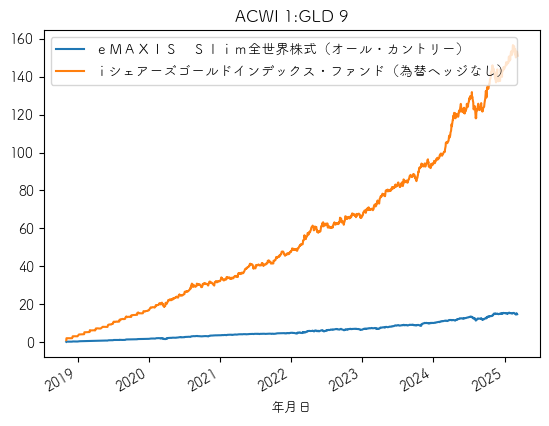

/var/folders/qb/1x__vlx132q0z6t8nsvyly100000gn/T/ipykernel_34379/3720497242.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.8' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  buy_history.loc[t] += buy_rate*buy_amount


,ｅＭＡＸＩＳ Ｓｌｉｍ全世界株式（オール・カントリー）,ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）
年月日,,
2025-03-03,30.197240,120.788959
2025-03-04,29.658426,121.289337
2025-03-05,29.487088,122.802579
2025-03-06,29.806092,122.584672
2025-03-07,29.217681,120.990724


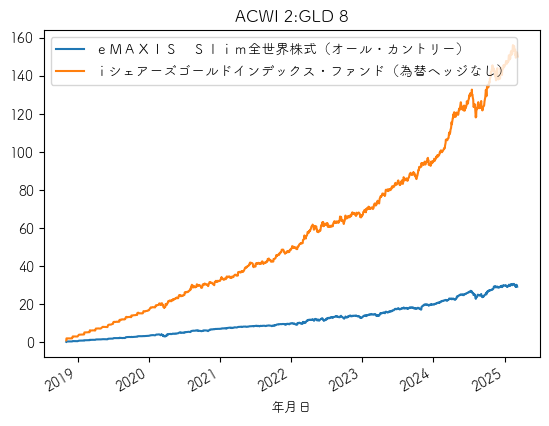

/var/folders/qb/1x__vlx132q0z6t8nsvyly100000gn/T/ipykernel_34379/3720497242.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.7' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  buy_history.loc[t] += buy_rate*buy_amount


,ｅＭＡＸＩＳ Ｓｌｉｍ全世界株式（オール・カントリー）,ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）
年月日,,
2025-03-03,44.822619,105.581251
2025-03-04,44.022843,106.018630
2025-03-05,43.768521,107.341350
2025-03-06,44.242029,107.150878
2025-03-07,43.368633,105.757613


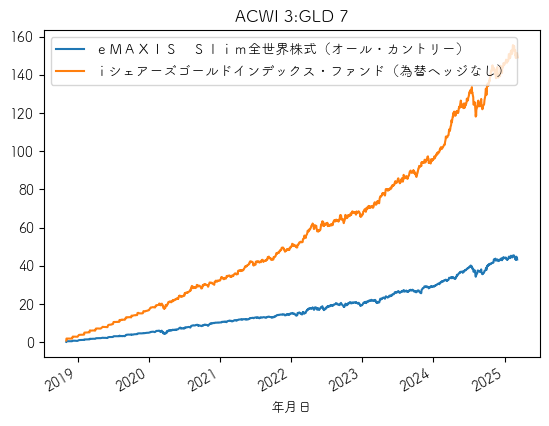

/var/folders/qb/1x__vlx132q0z6t8nsvyly100000gn/T/ipykernel_34379/3720497242.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.6' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  buy_history.loc[t] += buy_rate*buy_amount


,ｅＭＡＸＩＳ Ｓｌｉｍ全世界株式（オール・カントリー）,ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）
年月日,,
2025-03-03,59.077643,90.599361
2025-03-04,58.023512,90.974677
2025-03-05,57.688307,92.109704
2025-03-06,58.312406,91.946260
2025-03-07,57.161242,90.750698


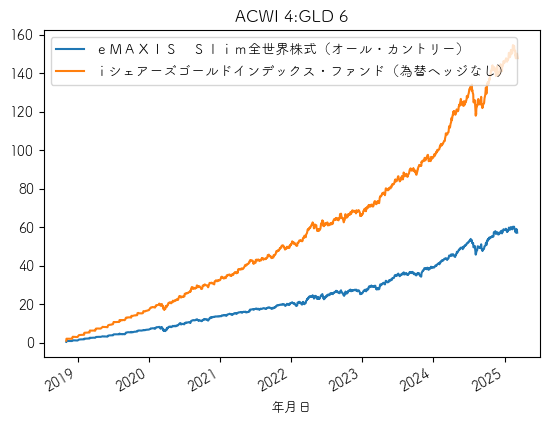

/var/folders/qb/1x__vlx132q0z6t8nsvyly100000gn/T/ipykernel_34379/3720497242.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  buy_history.loc[t] += buy_rate*buy_amount


,ｅＭＡＸＩＳ Ｓｌｉｍ全世界株式（オール・カントリー）,ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）
年月日,,
2025-03-03,73.324447,75.466689
2025-03-04,72.016109,75.779317
2025-03-05,71.600068,76.724762
2025-03-06,72.374670,76.588618
2025-03-07,70.945899,75.592749


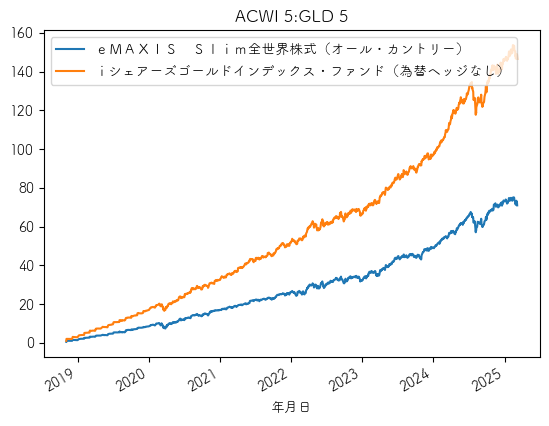

/var/folders/qb/1x__vlx132q0z6t8nsvyly100000gn/T/ipykernel_34379/3720497242.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  buy_history.loc[t] += buy_rate*buy_amount


,ｅＭＡＸＩＳ Ｓｌｉｍ全世界株式（オール・カントリー）,ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）
年月日,,
2025-03-03,87.524275,60.322748
2025-03-04,85.962566,60.572640
2025-03-05,85.465956,61.328362
2025-03-06,86.390566,61.219538
2025-03-07,84.685102,60.423511


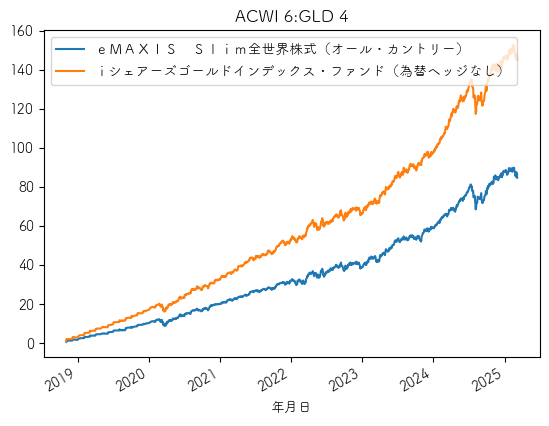

/var/folders/qb/1x__vlx132q0z6t8nsvyly100000gn/T/ipykernel_34379/3720497242.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  buy_history.loc[t] += buy_rate*buy_amount


,ｅＭＡＸＩＳ Ｓｌｉｍ全世界株式（オール・カントリー）,ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）
年月日,,
2025-03-03,101.523274,45.300076
2025-03-04,99.711779,45.487735
2025-03-05,99.135739,46.055253
2025-03-06,100.208235,45.973531
2025-03-07,98.229992,45.375745


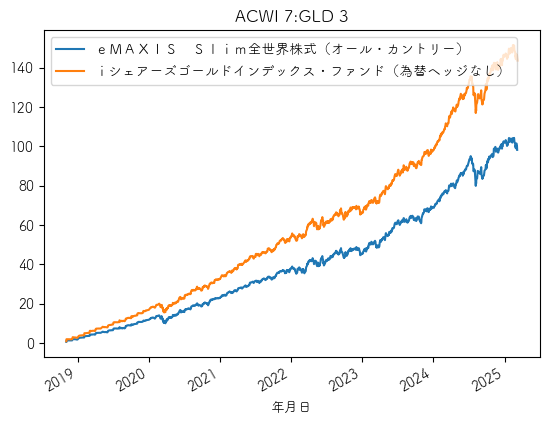

/var/folders/qb/1x__vlx132q0z6t8nsvyly100000gn/T/ipykernel_34379/3720497242.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  buy_history.loc[t] += buy_rate*buy_amount


,ｅＭＡＸＩＳ Ｓｌｉｍ全世界株式（オール・カントリー）,ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）
年月日,,
2025-03-03,115.032622,30.722725
2025-03-04,112.980078,30.849996
2025-03-05,112.327386,31.234890
2025-03-06,113.542595,31.179465
2025-03-07,111.301114,30.774044


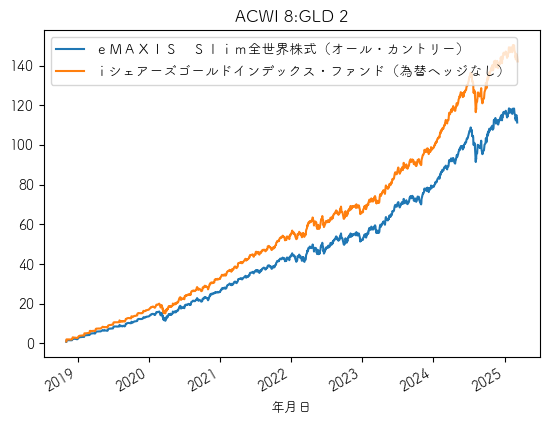

/var/folders/qb/1x__vlx132q0z6t8nsvyly100000gn/T/ipykernel_34379/3720497242.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  buy_history.loc[t] += buy_rate*buy_amount


,ｅＭＡＸＩＳ Ｓｌｉｍ全世界株式（オール・カントリー）,ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）
年月日,,
2025-03-03,128.996786,15.513918
2025-03-04,126.695078,15.578186
2025-03-05,125.963154,15.772544
2025-03-06,127.325881,15.744556
2025-03-07,124.812300,15.539833


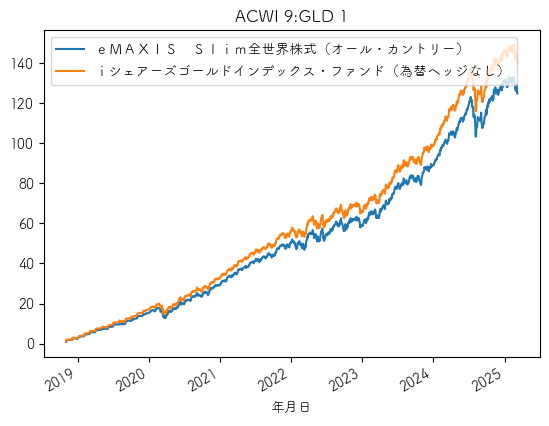

,ｅＭＡＸＩＳ Ｓｌｉｍ全世界株式（オール・カントリー）,ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）
年月日,,
2025-03-03,143.159445,0.0
2025-03-04,140.605030,0.0
2025-03-05,139.792748,0.0
2025-03-06,141.305090,0.0
2025-03-07,138.515541,0.0


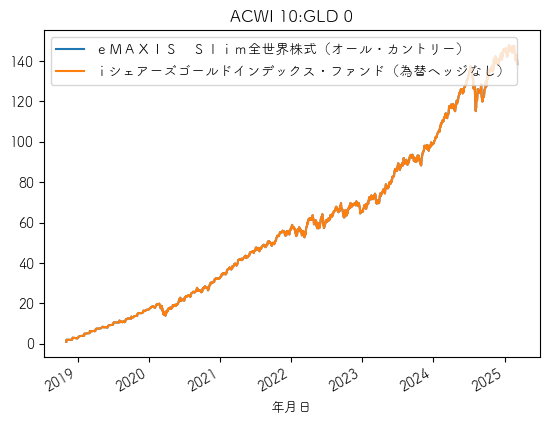

,ｅＭＡＸＩＳ Ｓｌｉｍ米国株式（Ｓ＆Ｐ５００）,ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）
年月日,,
2025-02-21,0.0,163.590981
2025-02-25,0.0,164.685253
2025-02-26,0.0,161.231624
2025-02-27,0.0,161.770753
2025-02-28,0.0,159.806402


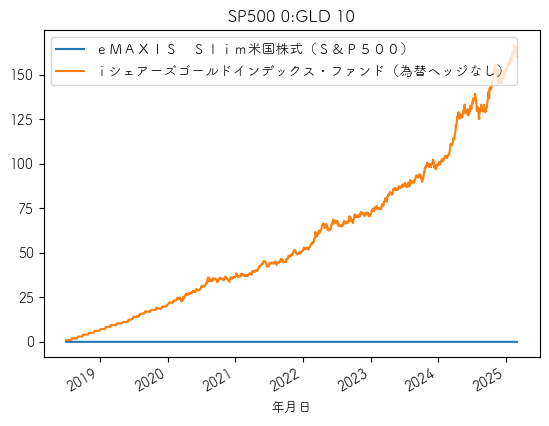

/var/folders/qb/1x__vlx132q0z6t8nsvyly100000gn/T/ipykernel_34379/3720497242.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.9' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  buy_history.loc[t] += buy_rate*buy_amount


,ｅＭＡＸＩＳ Ｓｌｉｍ米国株式（Ｓ＆Ｐ５００）,ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）
年月日,,
2025-02-21,16.327584,148.900611
2025-02-25,16.009179,149.896618
2025-02-26,15.795927,146.753123
2025-02-27,15.832288,147.243839
2025-02-28,15.625914,145.455885


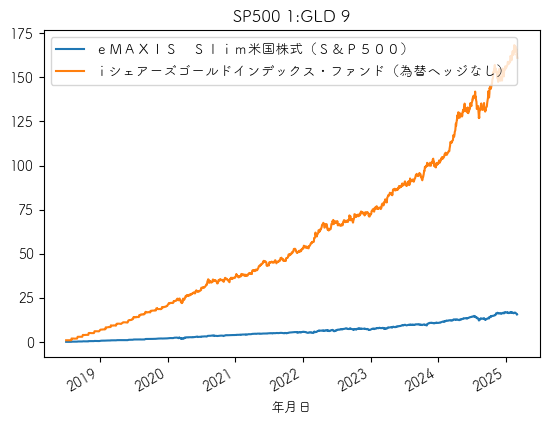

/var/folders/qb/1x__vlx132q0z6t8nsvyly100000gn/T/ipykernel_34379/3720497242.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.8' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  buy_history.loc[t] += buy_rate*buy_amount


,ｅＭＡＸＩＳ Ｓｌｉｍ米国株式（Ｓ＆Ｐ５００）,ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）
年月日,,
2025-02-21,32.495514,134.196669
2025-02-25,31.861818,135.094321
2025-02-26,31.437398,132.261246
2025-02-27,31.509764,132.703503
2025-02-28,31.099035,131.092110


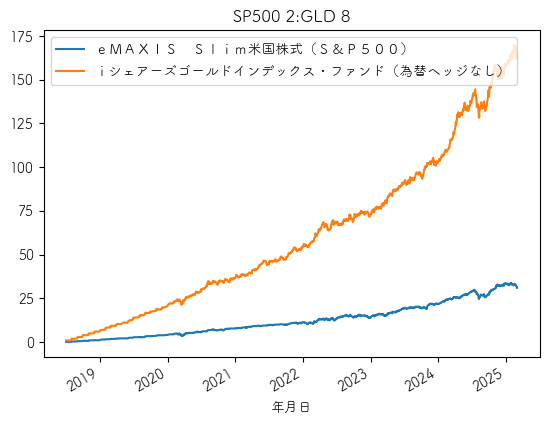

/var/folders/qb/1x__vlx132q0z6t8nsvyly100000gn/T/ipykernel_34379/3720497242.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.7' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  buy_history.loc[t] += buy_rate*buy_amount


,ｅＭＡＸＩＳ Ｓｌｉｍ米国株式（Ｓ＆Ｐ５００）,ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）
年月日,,
2025-02-21,49.201094,118.713464
2025-02-25,48.241621,119.507547
2025-02-26,47.599012,117.001344
2025-02-27,47.708581,117.392575
2025-02-28,47.086701,115.967099


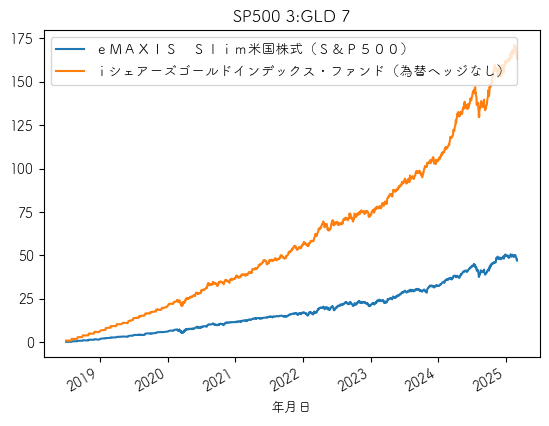

/var/folders/qb/1x__vlx132q0z6t8nsvyly100000gn/T/ipykernel_34379/3720497242.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.6' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  buy_history.loc[t] += buy_rate*buy_amount


,ｅＭＡＸＩＳ Ｓｌｉｍ米国株式（Ｓ＆Ｐ５００）,ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）
年月日,,
2025-02-21,65.925309,103.109020
2025-02-25,64.639697,103.798724
2025-02-26,63.778654,101.621951
2025-02-27,63.925468,101.961757
2025-02-28,63.092201,100.723654


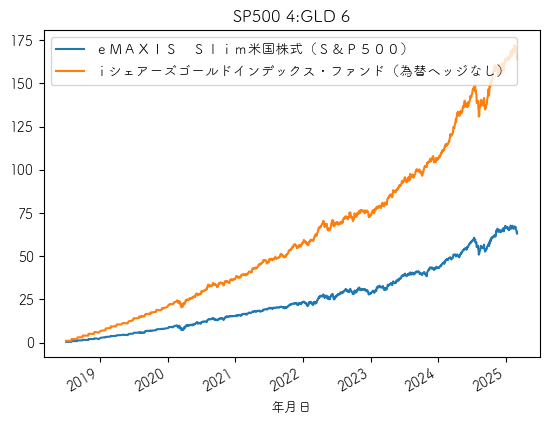

/var/folders/qb/1x__vlx132q0z6t8nsvyly100000gn/T/ipykernel_34379/3720497242.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  buy_history.loc[t] += buy_rate*buy_amount


,ｅＭＡＸＩＳ Ｓｌｉｍ米国株式（Ｓ＆Ｐ５００）,ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）
年月日,,
2025-02-21,82.655982,87.393149
2025-02-25,81.044105,87.977728
2025-02-26,79.964545,86.132740
2025-02-27,80.148617,86.420752
2025-02-28,79.103882,85.371361


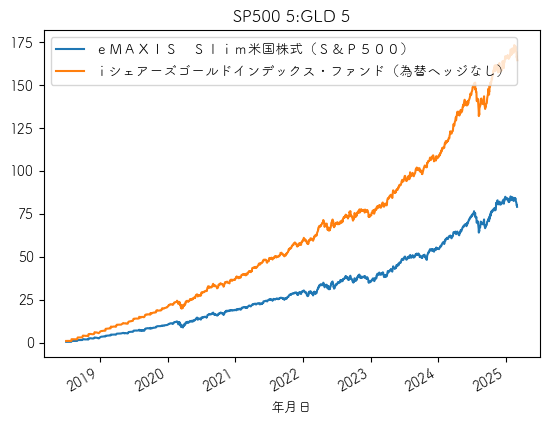

/var/folders/qb/1x__vlx132q0z6t8nsvyly100000gn/T/ipykernel_34379/3720497242.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  buy_history.loc[t] += buy_rate*buy_amount


,ｅＭＡＸＩＳ Ｓｌｉｍ米国株式（Ｓ＆Ｐ５００）,ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）
年月日,,
2025-02-21,99.813542,71.035399
2025-02-25,97.867074,71.510559
2025-02-26,96.563422,70.010905
2025-02-27,96.785703,70.245009
2025-02-28,95.524104,69.392037


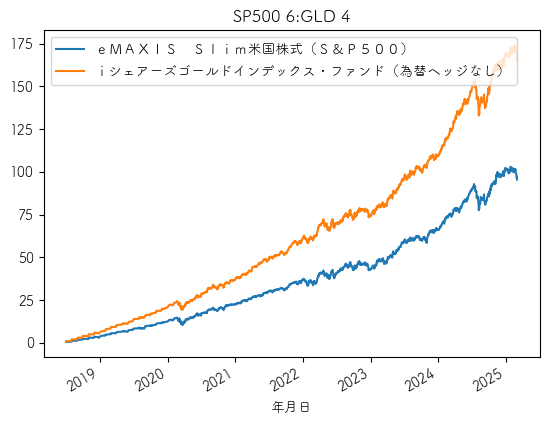

/var/folders/qb/1x__vlx132q0z6t8nsvyly100000gn/T/ipykernel_34379/3720497242.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  buy_history.loc[t] += buy_rate*buy_amount


,ｅＭＡＸＩＳ Ｓｌｉｍ米国株式（Ｓ＆Ｐ５００）,ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）
年月日,,
2025-02-21,117.631687,53.898032
2025-02-25,115.337747,54.258560
2025-02-26,113.801374,53.120699
2025-02-27,114.063336,53.298325
2025-02-28,112.576523,52.651134


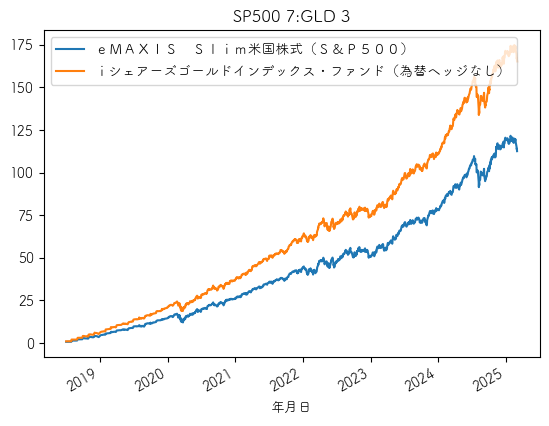

/var/folders/qb/1x__vlx132q0z6t8nsvyly100000gn/T/ipykernel_34379/3720497242.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  buy_history.loc[t] += buy_rate*buy_amount


,ｅＭＡＸＩＳ Ｓｌｉｍ米国株式（Ｓ＆Ｐ５００）,ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）
年月日,,
2025-02-21,135.788240,36.333969
2025-02-25,133.140228,36.577010
2025-02-26,131.366714,35.809950
2025-02-27,131.669111,35.929692
2025-02-28,129.952807,35.493404


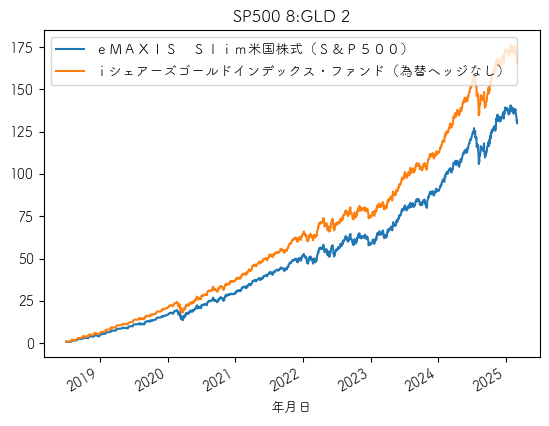

/var/folders/qb/1x__vlx132q0z6t8nsvyly100000gn/T/ipykernel_34379/3720497242.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  buy_history.loc[t] += buy_rate*buy_amount


,ｅＭＡＸＩＳ Ｓｌｉｍ米国株式（Ｓ＆Ｐ５００）,ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）
年月日,,
2025-02-21,154.060106,18.501276
2025-02-25,151.055774,18.625032
2025-02-26,149.043613,18.234445
2025-02-27,149.386700,18.295418
2025-02-28,147.439448,18.073260


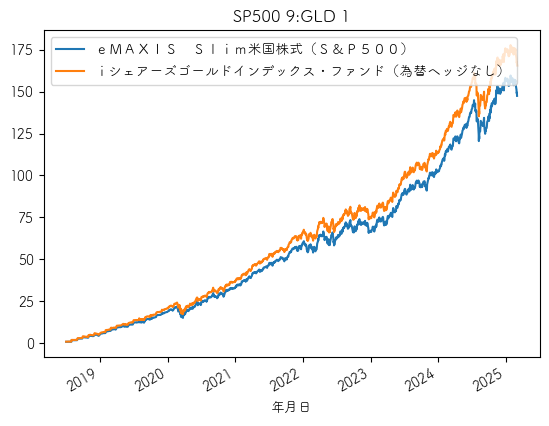

,ｅＭＡＸＩＳ Ｓｌｉｍ米国株式（Ｓ＆Ｐ５００）,ｉシェアーズゴールドインデックス・ファンド（為替ヘッジなし）
年月日,,
2025-02-21,172.847040,0.0
2025-02-25,169.476343,0.0
2025-02-26,167.218809,0.0
2025-02-27,167.603734,0.0
2025-02-28,165.419023,0.0


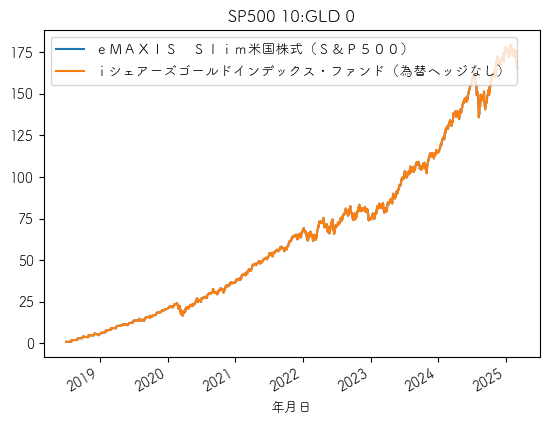

In [35]:
return_risk = {}
total_ts = {}

for condition in conditions:

    close_df, _ = pick_csv_data(condition[0].keys())
    portfolio = pd.Series(condition[0])/sum(condition[0].values())

    buy_monthes = condition[1]
    buy_amount = condition[2]
    name = condition[3]
    prev = -1

    result = close_df * 0  # 現在資産
    buy_history = close_df * 0  # 投資記録

    for t,v in close_df.iterrows():
        if t.month != prev:
            # reset behavior
            bought = False
            rebalanced = False
            prev = t.month
        if t.month in buy_monthes:
            if not bought:
                # 現在資産比率に基づき購買比率を決定する
                buy_rate = rebalance_buy(result.loc[t], portfolio, buy_amount)
                buy_history.loc[t] += buy_rate*buy_amount
                # buy_fundで、今買った投信の将来の値動きをベクタとして取得、ポートフォリオ比率をかけて購入後の値動きを結果時系列に加算
                result = result.add(buy_fund(close_df, t)*buy_rate*buy_amount, fill_value=0)  # 現在資産に買った投信を加算
                bought = True

    display(result.tail())
    result.loc[datetime.datetime(2018,1,1):].plot(stacked=True, title=name)#, logy=True)
    plt.show()
    plt.close('all')

    total = result.sum(axis=1)

    return_risk[name] = [anualized_return(total, period=60), anualized_risk(total, period=60)]  # 時系列はnameで識別するので複数の比較条件を混在させてもOK
    total_ts[name] = result.sum(axis=1)


## リスクリターン平面の描画

※リターン・リスクの計算は、直近から5年間(60ヶ月)の月次リターンの幾何平均と標準偏差を用いているので、上の時系列の最終値の上下と一致しない場合がある

- [ ] 国債からの利回り (長期金利,リスク0) からの接線を引く

## ACWI:GLD

In [36]:
X = range(11)
Y = [return_risk[f'ACWI {x}:GLD {10-x}'] for x in X]
return_risk_df = pd.DataFrame(Y, columns=['return','risk'], index=X)
display(return_risk_df)

,return,risk
0,0.495686,0.141647
1,0.498376,0.132936
2,0.500840,0.126875
3,0.503132,0.123561
4,0.505212,0.123076
5,0.507044,0.125458
6,0.508830,0.130645
7,0.510528,0.138299
8,0.512217,0.148050
9,0.513583,0.159595


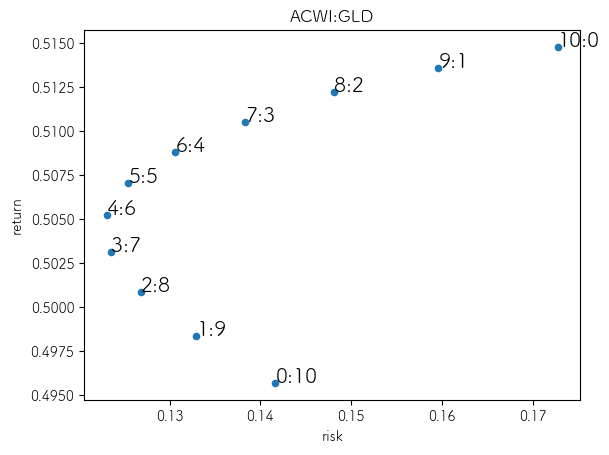

In [25]:
ax = return_risk_df.plot.scatter(x='risk', y='return', title='ACWI:GLD')
for p, v in return_risk_df.iterrows():
    ax.annotate(f'{p}:{10-p}', xy=(v.iloc[1], v.iloc[0]), size=15)
plt.show()

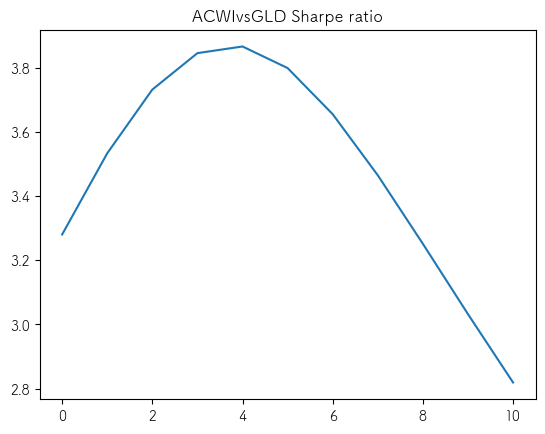

In [33]:
(return_risk_df['return']/return_risk_df['risk']).plot(title='ACWIvsGLD Sharpe ratio')
plt.show()

## SP500:GLD

In [37]:
X = range(11)
Y = [return_risk[f'SP500 {x}:GLD {10-x}'] for x in X]
return_risk_df = pd.DataFrame(Y, columns=['return','risk'], index=X)
display(return_risk_df)

,return,risk
0,0.460306,0.140326
1,0.466216,0.131949
2,0.471938,0.126460
3,0.477339,0.124131
4,0.482695,0.124850
5,0.488001,0.128457
6,0.493049,0.134890
7,0.498002,0.143731
8,0.502939,0.154689
9,0.507737,0.167453


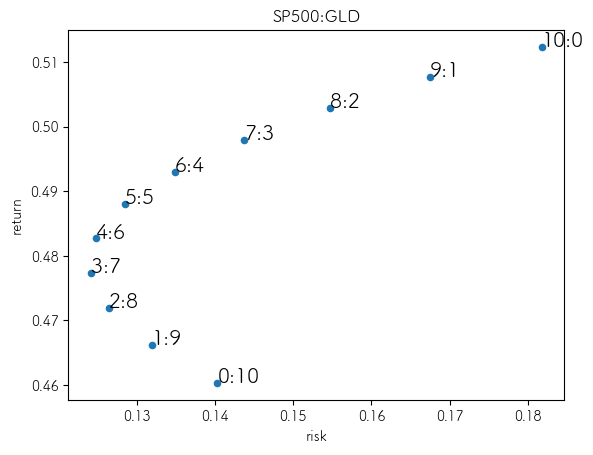

In [29]:
ax = return_risk_df.plot.scatter(x='risk', y='return', title='SP500:GLD')
for p, v in return_risk_df.iterrows():
    ax.annotate(f'{p}:{10-p}', xy=(v.iloc[1], v.iloc[0]), size=15)
plt.show()

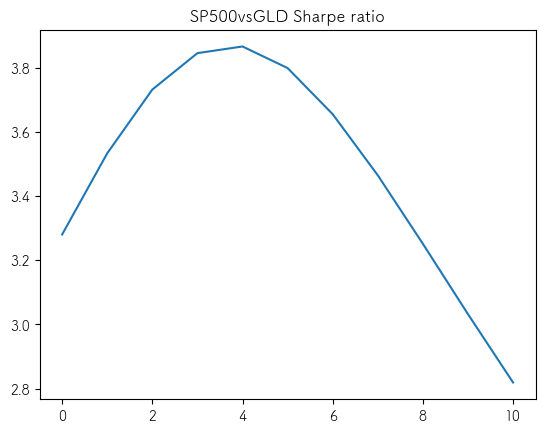

In [31]:
(return_risk_df['return']/return_risk_df['risk']).plot(title='SP500vsGLD Sharpe ratio')
plt.show()